In [89]:
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
# sklearn
from sklearn.model_selection import train_test_split

In [90]:
import DataStats
import PipeTransformers

# Use stratify method to split train and test data sets from original data

In [30]:
data = pd.read_csv('../data/original_data.csv').drop(columns=['Unnamed: 0'])
# remove the rows that have NaN values in the sfdm2 column
data_target_missing = data[data['sfdm2'].isna()] 
data = data.dropna(subset=['sfdm2'])

In [ ]:
# data_target_missing.to_csv('../data/original_data_target_missing.csv', index=False)

In [32]:
# the target and features
y = data["sfdm2"]
X = data.drop(columns=['sfdm2'])
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")  

X shape: (7705, 47)
y shape: (7705,)


In [33]:
# split the data into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,            # 20% for test
    random_state=1,          # for reproducibility
    stratify=y                # this keeps class distribution consistent
)

In [35]:
# conbine the train and test sets
X_train['sfdm2'] = y_train
X_test['sfdm2'] = y_test
# make sure naming consistent
train_data = X_train
test_data = X_test
# save the train and test sets
train_data.to_csv('../data/train_data.csv', index=False)
test_data.to_csv('../data/test_data.csv', index=False)

## Check the propotion of labels in target variable in the two data sets

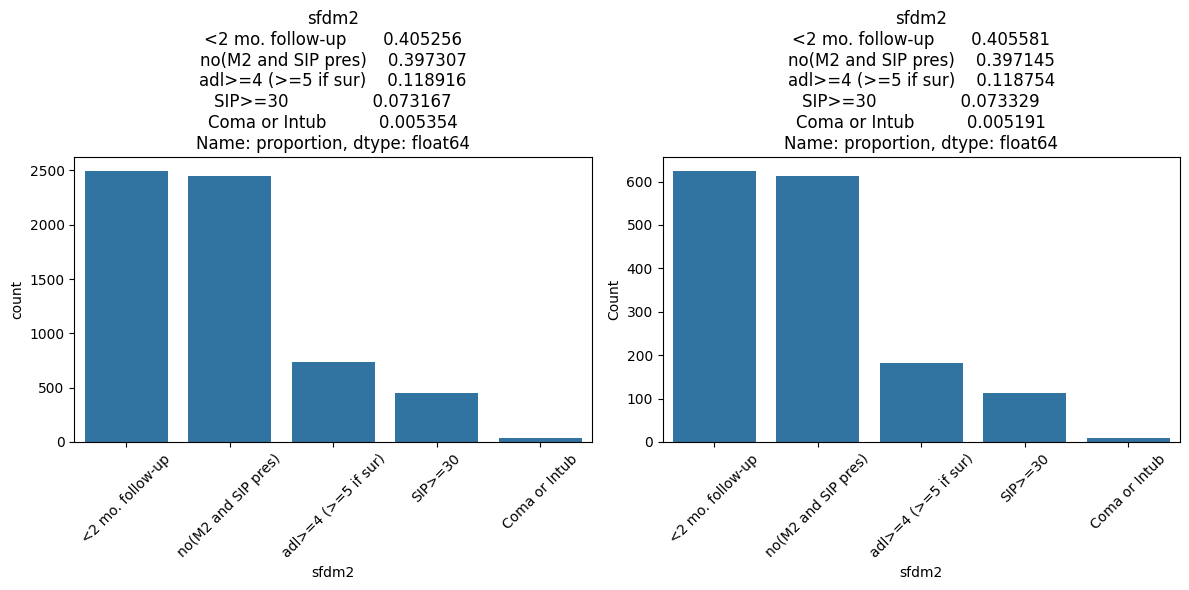

In [62]:
# print the proportion of different target values
# print("The ratio of the target in the train set and test set is:")
# print(train_data['sfdm2'].value_counts(normalize=True))
# print(test_data['sfdm2'].value_counts(normalize=True))

# visualize the ratio of the target in the train set and test set
def _visualize_target_ratio():
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Order x-values in descending order for train_data
    train_order = train_data['sfdm2'].value_counts(ascending=False).index
    sns.countplot(x='sfdm2', data=train_data, ax=axes[0], order=train_order)
    axes[0].set_title(train_data['sfdm2'].value_counts(normalize=True))
    axes[0].tick_params(axis='x', rotation=45)

    # Order x-values in descending order for test_data
    test_order = test_data['sfdm2'].value_counts(ascending=False).index
    sns.countplot(x='sfdm2', data=test_data, ax=axes[1], order=test_order)
    axes[1].set_title(test_data['sfdm2'].value_counts(normalize=True))
    axes[1].tick_params(axis='x', rotation=45)

    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    return None

# check the ratio of the target in the train set and test set
_visualize_target_ratio()

## What to do next

Now we have stratify the sample into trian and test sets. 

We will start build our models on the train data, which means **we are going to use train data only.**

We first **use the created pipeline(s) to impute and encode the variables in train data.** 

Then we will **check the distributions** about these variables visually, **detect potential outliers** and 
**make necessary transformations** on these variables.

In [69]:
# update data to train_data
data = pd.read_csv('../data/train_data.csv')
data.shape

(6164, 48)

In [66]:
# initialize the data cleaning transformers
importlib.reload(PipeTransformers)
imputer_encoder_transformers = PipeTransformers.create_imputer_encoder_pipelines()
imputer_encoder_transformers[0]

Numerical Columns:
 id; age; death; hospdead; slos; d.time; num.co; edu; scoma; charges; totcst; totmcst; avtisst; sps; aps; surv2m; surv6m; hday; diabetes; dementia; prg2m; prg6m; dnrday; meanbp; wblc; hrt; resp; temp; pafi; alb; bili; crea; sod; ph; glucose; bun; urine; adlp; adls; adlsc
Categorical Columns:
 sex; dzgroup; dzclass; income; race; ca; dnr; sfdm2


ColumnTransformer(transformers=[('num_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['id', 'age', 'death', 'hospdead', 'slos',
                                  'd.time', 'num.co', 'edu', 'scoma', 'charges',
                                  'totcst', 'totmcst', 'avtisst', 'sps', 'aps',
                                  'surv2m', 'surv6m', 'hday', 'diabetes',
                                  'dementia', 'prg2m', 'prg6m', 'dnrday',
                                  'meanbp', 'wblc', 'hrt', 'resp', 'temp',
                                  'pafi', 'alb', ...]),
                                ('cat_on_...
                                 ['income', 'dnr', 'sfdm2']),
                                ('cat_oh_encoder',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['ca', 'sex', 'dzclass', 'race', 'dzgroup']),
                                ('cat_sim_encoder',
                                 Pipeline(steps=[('cat_sim_encoder',
                                                  CustomFunctionTransformer(func=<function create_imputer_encoder_pipelines.<locals>.cat_sim_maps_func at 0x12b7bea20>))]),
                                 ['income', 'dnr', 'sfdm2'])])

In [70]:
# try the transformers on the train data
from PipeTransformers import imputer_encoder_transform
imputer_encoder_transform(imputer_encoder_transformers[0], data)

/Users/gufeng/2025_winter/DASC_5420/Final_Project_5420/src/PipeTransformers.py:201: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transformed_data[missing_col] = transformed_data[missing_col].fillna(mean_value)


,num_imputer__id,num_imputer__age,num_imputer__death,num_imputer__hospdead,num_imputer__slos,num_imputer__d.time,num_imputer__num.co,num_imputer__edu,num_imputer__scoma,num_imputer__charges,...,cat_oh_encoder__dzgroup_CHF,cat_oh_encoder__dzgroup_COPD,cat_oh_encoder__dzgroup_Cirrhosis,cat_oh_encoder__dzgroup_Colon Cancer,cat_oh_encoder__dzgroup_Coma,cat_oh_encoder__dzgroup_Lung Cancer,cat_oh_encoder__dzgroup_MOSF w/Malig,cat_sim_encoder__income,cat_sim_encoder__dnr,cat_sim_encoder__sfdm2
0,231.0,77.74695,1.0,0.0,6.0,422.0,1.0,11.724578,0.0,16325.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
1,5089.0,69.64294,0.0,0.0,15.0,674.0,3.0,12.0,0.0,58826.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
2,2579.0,61.91397,1.0,1.0,22.0,22.0,2.0,9.0,0.0,69577.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,5.0
3,8988.0,83.39496,0.0,0.0,49.0,485.0,0.0,13.0,0.0,112915.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0
4,8696.0,69.84796,1.0,0.0,20.0,24.0,2.0,10.0,89.0,58550.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6159,8352.0,58.55197,1.0,0.0,5.0,74.0,1.0,12.0,0.0,3079.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0
6160,8635.0,81.81195,1.0,1.0,8.0,8.0,1.0,14.0,0.0,66049.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
6161,1433.0,33.043,0.0,0.0,62.0,515.0,3.0,11.0,37.0,584811.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0
6162,8070.0,62.245,0.0,0.0,15.0,1685.0,1.0,12.0,0.0,15038.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0


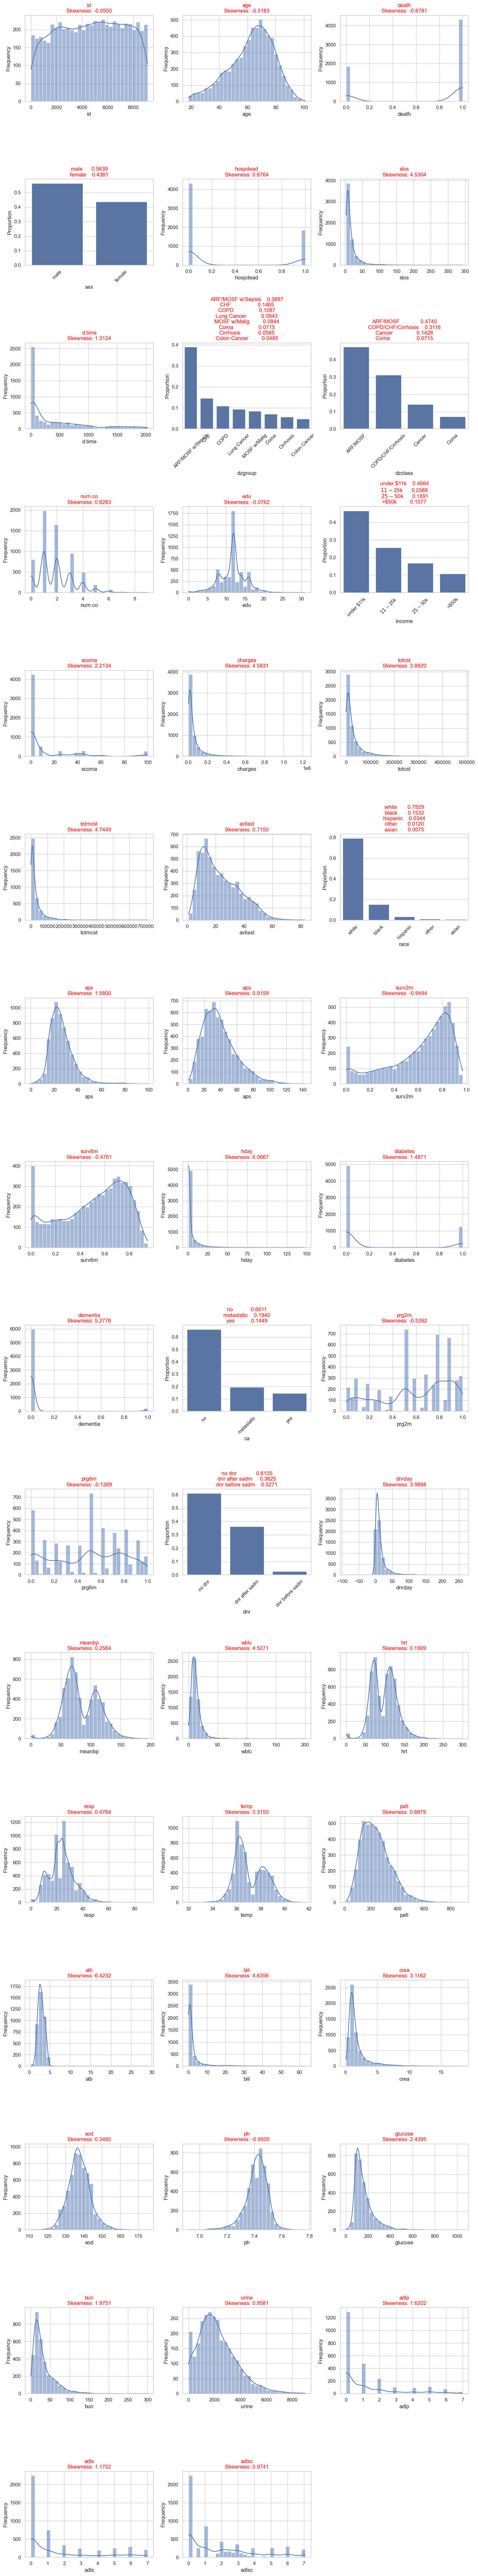

In [ ]:
# visualzie the feature distributions
def visualize_feature_distributions(data):
    # Set the style of seaborn
    sns.set_theme(style="whitegrid")

    # Create a figure with subplots
    num_features = data.shape[1] - 1  # Exclude the target variable
    fig, axes = plt.subplots(nrows=(num_features + 2) // 3, ncols=3, figsize=(15, 5 * ((num_features + 2) // 3)))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Loop through each feature
    for i, column in enumerate(data.columns[:-1]):  # Exclude the target variable
        if data[column].dtype in ['float64', 'int64']:  # Numerical variables
            sns.histplot(data[column].dropna(), bins=30, kde=True, ax=axes[i])
            skewness = skew(data[column].dropna())
            axes[i].set_title(f'{column}\nSkewness: {skewness:.4f}', color='red')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
        else:  # Categorical variables
            proportions = data[column].value_counts(normalize=True).round(4)
            sns.barplot(x=proportions.index, y=proportions.values, ax=axes[i])
            proportions_string = proportions.to_string(index=True, header=False)
            axes[i].set_title(f'{proportions_string}', color = 'red')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Proportion')
            axes[i].tick_params(axis='x', rotation=45)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Visualize the distributions of the features in data
visualize_feature_distributions(data)

## What to do on top the original data after observing their feature distributions?

- **Detect outliers and filter them out:**
 
    **Some features appearently have outliers by checking the skewness.**

    We can set a threshold on skewness and filter the features that need to be filtered outliers out.

    The sepcific algorithm to filter outliers can be designed later, but we know we shold filter these features.

    This filtering means we remove the rows that contain one or more of these outliers under these selected features.

- **Do necessary transformations on some features**

    **By doing transformations, we expect to explain the variation in target variable more**

    Take a simple logrithm transformation on some variables might be enough to spread off our feature values and is easy to convert them back.

In [88]:
# take out the skewness of the numerical features
feature_skewness = DataStats.distribution_stats(data).loc["skewness", :]
feature_skewness

There is at least one variable that is highly skewed
There is at least one variable that has more outliers
There is no vairable that is normally distributed


/Users/gufeng/ENTER/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


id         -0.054996
age        -0.518443
death      -0.878319
hospdead    0.876629
slos        4.531479
d.time      1.312692
num.co      0.828506
edu        -0.076208
scoma       2.213976
charges     4.584197
totcst      3.883041
totmcst     4.746751
avtisst     0.715176
sps         1.580390
aps         0.916172
surv2m     -0.949622
surv6m     -0.476243
hday        6.068220
diabetes    1.487494
dementia    5.278929
prg2m      -0.539324
prg6m      -0.126916
dnrday      3.989748
meanbp      0.256502
wblc        4.508203
hrt         0.190967
resp        0.476486
temp        0.315087
pafi        0.888220
alb         6.425704
bili        4.637215
crea        3.116991
sod         0.346601
ph         -0.950311
glucose     2.440688
bun         1.976060
urine       0.958606
adlp        1.621204
adls        1.170574
adlsc       0.974296
Name: skewness, dtype: float64